### Import Knet & ONNX

In [1]:
push!(LOAD_PATH, "/Users/egeersu/Desktop/KnetONNX")
using Knet; using KnetONNX;

### Import MNIST Dataset

In [2]:
include(Knet.dir("data","mnist.jl"))
dtrn,dtst = mnistdata(xsize=(784,:));

┌ Info: Loading MNIST...
└ @ Main /Users/egeersu/.julia/packages/Knet/LjPts/data/mnist.jl:33


### Read ONNX Graph

In [4]:
file_path = "mlp.onnx"
graph = ONNXtoGraph(file_path);

In [5]:
PrintGraph(graph)

model inputs: ["input.1"]
model outputs: ["7"]
(op1) Gemm
	input1: input.1
	input2: fc1.weight
	input3: fc1.bias
	output1: 5
(op2) Relu
	input1: 5
	output1: 6
(op3) Gemm
	input1: 6
	input2: fc2.weight
	input3: fc2.bias
	output1: 7


### Re-construct model in Knet

In [6]:
model = KnetModel(file_path);

In [8]:
x,y = first(dtrn)
model(x)

10×100 Array{Float64,2}:
 -0.0205971    -0.0226277   …  -0.0187573  -0.046555   -0.00095522
  0.0704087     0.0829956       0.159313    0.0451799   0.124625  
 -0.102386     -0.112921       -0.127871   -0.0696284  -0.0618576 
 -0.0889861    -0.0527647      -0.103899   -0.0400584  -0.0559716 
  0.000285943   0.00279338      0.0976434  -0.021248    0.0492275 
 -0.0435675    -0.091755    …  -0.0559643  -0.0800365  -0.0915131 
  0.107065      0.141739        0.234474    0.048474    0.13396   
  0.124097      0.218272        0.185513    0.16647     0.156716  
  0.0719092    -0.0730222       0.135625    0.0611211  -0.0303393 
 -0.134525     -0.174273       -0.024433   -0.147765   -0.095473  

### Re-train the model in Knet

In [73]:
EPOCH = 2
@show accuracy(model, dtst)
progress!(sgd(model, repeat(dtrn,EPOCH)))
@show accuracy(model, dtst)

┣                    ┫ [0.08%, 1/1200, 00:00/00:30, 40.12i/s] 

accuracy(model, dtst) = 0.9512


┣████████████████████┫ [100.00%, 1200/1200, 00:49/00:49, 24.49i/s] 


accuracy(model, dtst) = 0.9625


0.9625

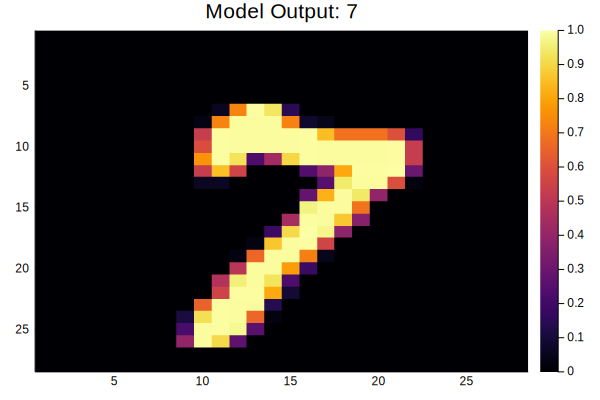

In [71]:
predictMNIST(model, dtrn)

In [10]:
using Images, Plots
function predictMNIST(model, data)
    i = rand(1:100)
    x = rand(data)[1][:,i]
    out = argmax(model(x)); if out==10; out = 0; end
    plot(heatmap(permutedims(reshape(x, 28, 28))), yflip = true, title = ("Model Output: " * string(out)))
end

predictMNIST (generic function with 1 method)